<a href="https://colab.research.google.com/github/naruephonboo/Data-Set-in-colab.research/blob/main/finalproject_cs245_r014.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# กลุ่ม R014
1. 6309681333 นฤภร บุญยวง
2. 6409610703 ภูริพงศ์ นวลใย
3. 6409610711 ยัสมิน บือแนสะเตง 


# Data Set
This dataset is about applying for a computer scientist job in order to study the job turnover rate due to various environmental factors such as university education. Characteristics of the city and the type of company applied for by collecting data in the form of a csv file and separating them into columns as follows.
*   enrollee_id : Unique ID for candidate
* city: City code
* city_ development _index : Developement index of the city (scaled)
* gender: Gender of candidate
* relevent_experience: Relevant experience of candidate
* enrolled_university: Type of University course enrolled if any
* education_level: Education level of candidate
* major_discipline :Education major discipline of candidate
* experience: Candidate total experience in years
* company_size: No of employees in current employer's company
* company_type : Type of current employer
* lastnewjob: Difference in years between previous job and current job
* training_hours: training hours completed




#  Import Required Packages

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import matplotlib as mpt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

data =  pd.read_csv('/content/drive/MyDrive/Classroom/CS245_65-1 870001_650001/aug_test.csv', encoding = "ISO-8859-1")

Mounted at /content/drive


# Display Data Set

In [ ]:
print(data)

      enrollee_id      city  city_development_index  gender  \
0           32403   city_41                   0.827    Male   
1            9858  city_103                   0.920  Female   
2           31806   city_21                   0.624    Male   
3           27385   city_13                   0.827    Male   
4           27724  city_103                   0.920    Male   
...           ...       ...                     ...     ...   
2124         1289  city_103                   0.920    Male   
2125          195  city_136                   0.897    Male   
2126        31762  city_100                   0.887    Male   
2127         7873  city_102                   0.804    Male   
2128        12215  city_102                   0.804    Male   

          relevent_experience enrolled_university education_level  \
0     Has relevent experience    Full time course        Graduate   
1     Has relevent experience       no_enrollment        Graduate   
2      No relevent experience       

# Display Summary Information

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2129 entries, 0 to 2128
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             2129 non-null   int64  
 1   city                    2129 non-null   object 
 2   city_development_index  2129 non-null   float64
 3   gender                  1621 non-null   object 
 4   relevent_experience     2129 non-null   object 
 5   enrolled_university     2098 non-null   object 
 6   education_level         2077 non-null   object 
 7   major_discipline        1817 non-null   object 
 8   experience              2124 non-null   object 
 9   company_size            1507 non-null   object 
 10  company_type            1495 non-null   object 
 11  last_new_job            2089 non-null   object 
 12  training_hours          2129 non-null   int64  
dtypes: float64(1), int64(2), object(10)
memory usage: 216.4+ KB


In [ ]:
data.describe()

,enrollee_id,city_development_index,training_hours
count,2129.000000,2129.000000,2129.000000
mean,16861.614843,0.824984,64.983091
std,9576.846029,0.125074,60.238660
min,3.000000,0.448000,1.000000
25%,8562.000000,0.698000,23.000000
50%,16816.000000,0.903000,47.000000
75%,25129.000000,0.920000,86.000000
max,33353.000000,0.949000,334.000000


# Data Cleansing

In [ ]:
#Checking NaN values in every column
booleanindex = data.isnull()
data_NaN = booleanindex.sum()
dataList_NaN = {x:data[x].isnull().sum() for x in data.columns if data[x].isnull().sum()>0}
print(dict(sorted(dataList_NaN.items(),reverse=True)))

{'major_discipline': 312, 'last_new_job': 40, 'gender': 508, 'experience': 5, 'enrolled_university': 31, 'education_level': 52, 'company_type': 634, 'company_size': 622}


In [ ]:
#Check whether there is any duplicate in the dataset.
print("Number of duplicate found = ",(data.duplicated().sum()))

Number of duplicate found =  0


In [ ]:
#Drop NaN value in column education_level and enrolled_university
data = data[data['education_level'].notna()]
data.isnull().sum()

enrollee_id                 0
city                        0
city_development_index      0
gender                    471
relevent_experience         0
enrolled_university         0
education_level             0
major_discipline          254
experience                  3
company_size              585
company_type              592
last_new_job               30
training_hours              0
dtype: int64

# Data Validity

In [ ]:
#Fill blank in enrolled_university with 'no_enrollement'
data.replace({'enrolled_university':{'':'no_enrollement'}},inplace=True)

In [ ]:
#Replace string type that cannot convert to integer to string type that can convert to integer
data.replace({'last_new_job':{'never':'-1','>4':'5'}},inplace=True)
#Fill all NaN value with mode value of dataset
data['last_new_job'].fillna(data['last_new_job'].mode()[0], inplace = True)
#Change datatype object to integer64
data['last_new_job'] = data['last_new_job'].astype(int)
data.dtypes

enrollee_id                 int64
city                       object
city_development_index    float64
gender                     object
relevent_experience        object
enrolled_university        object
education_level            object
major_discipline           object
experience                 object
company_size               object
company_type               object
last_new_job                int64
training_hours              int64
dtype: object

In [ ]:
#Fill blank in column gender with 'Other'
data.replace({'gender':{'':'Other'}},inplace=True)

In [ ]:
#Classify the company size and fill NaN with 0
data.replace({'company_size':{'<10':'small','50-99':'small','100-500':'small','500-999':'small','1000-4999':'medium','50000-9999':'medium','10000+':'large','1/10/1949':'0','':'0'}},inplace=True)
data['company_size'] = data['company_size'].fillna(0)

In [ ]:
#Valid experience column
data.replace({'experience':{'<1':'0.5','>20':'21'}},inplace=True)
#Change datatype object to float64
data['experience'] = data['experience'].astype(float)
data.dtypes

enrollee_id                 int64
city                       object
city_development_index    float64
gender                     object
relevent_experience        object
enrolled_university        object
education_level            object
major_discipline           object
experience                float64
company_size               object
company_type               object
last_new_job                int64
training_hours              int64
dtype: object

In [ ]:
#Fill blank in column major_discipline with 'Other'
data.replace({'major_discipline':{'':'Other'}},inplace=True)

In [ ]:
#Fill blank in column company_type with 'Other'
data.replace({'company_type':{'':'Other'}},inplace=True)

# Data Wrangling and Data Visualization

pie chart represents Percentage of data scientists education levels to job turnover

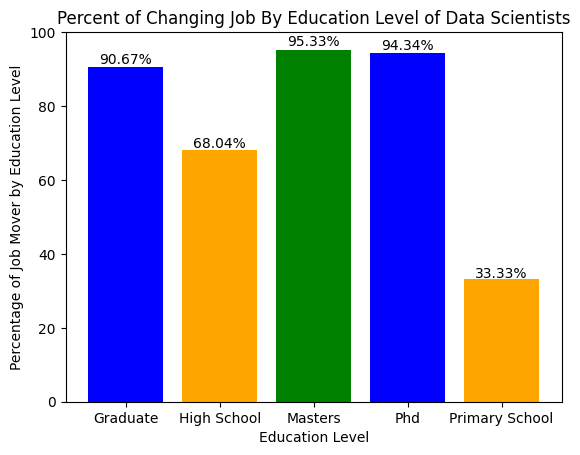

In [ ]:
ed_level = data[data['last_new_job'] > 0].groupby('education_level').enrollee_id.count()
alled_level = data.groupby('education_level').enrollee_id.count()
percent_edlevel = [round(x / y * 100, 2) for x, y in zip(ed_level, alled_level)]

colour = ["blue", "orange", "green"]
bar = plt.bar(ed_level.index,  percent_edlevel, color=colour)
i = 0
for p in bar:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2, y+height*1.01, str(percent_edlevel[i])+'%', ha='center')
    i+=1

plt.title('Percent of Changing Job By Education Level of Data Scientists')
plt.xlabel("Education Level")
plt.ylabel("Percentage of Job Mover by Education Level")
plt.show() 

bar chart represents the percentage of people who move jobs by type of university enrollment.

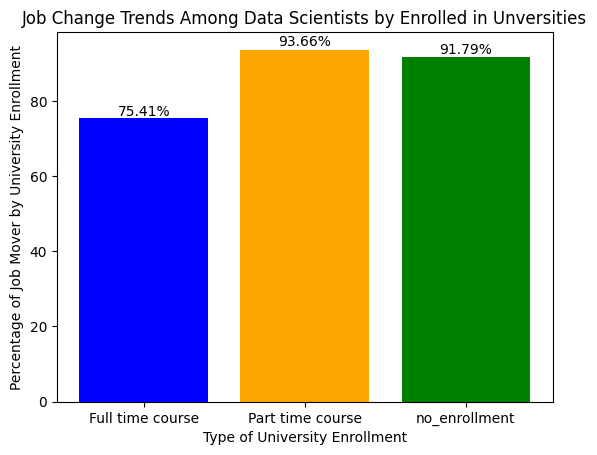

In [ ]:
plt.style.use('default')

enr_uni = data[data['last_new_job'] > 0].groupby('enrolled_university').enrollee_id.count()
allenr_uni = data.groupby('enrolled_university').enrollee_id.count()
percent_enruni = [round(x / y * 100, 2) for x, y in zip(enr_uni, allenr_uni)]

colour = ["blue", "orange", "green"]
bar = plt.bar(enr_uni.index,  percent_enruni,color=colour)
i = 0
for p in bar:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2, y+height*1.01, str(percent_enruni[i])+'%', ha='center')
    i+=1

plt.title("Job Change Trends Among Data Scientists by Enrolled in Unversities")
plt.xlabel("Type of University Enrollment")
plt.ylabel("Percentage of Job Mover by University Enrollment")
plt.show()

bar chart represents  the number of data scientists changing jobs based on the city development index.

city      city_development_index
city_103  0.920                     435
city_21   0.624                     234
city_16   0.910                     154
city_114  0.926                     125
city_160  0.920                     104
city_136  0.897                      54
city_67   0.855                      34
city_102  0.804                      27
city_71   0.884                      27
city_11   0.550                      25
Name: enrollee_id, dtype: int64


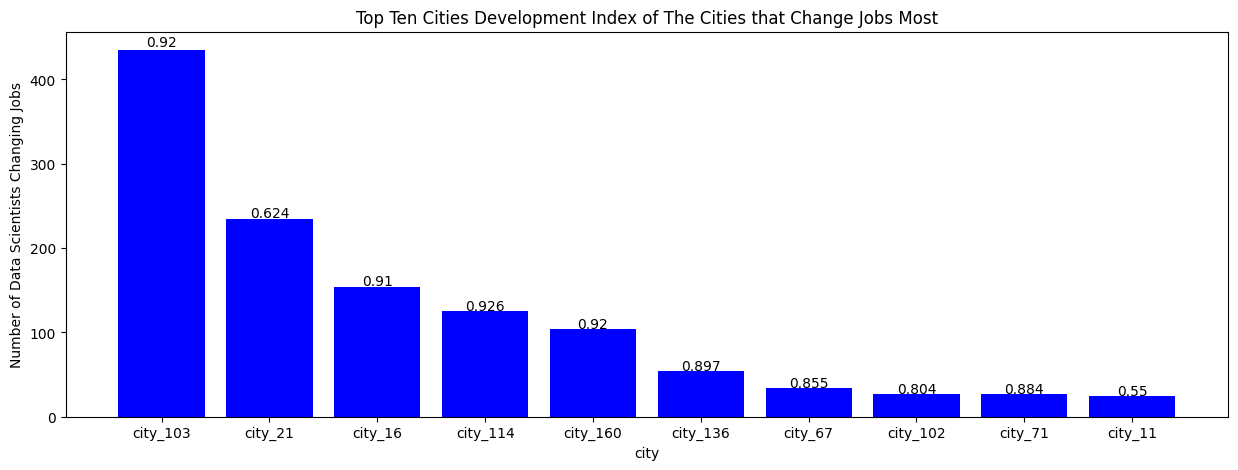

In [ ]:
from os import confstr_names
plt.style.use('default')

ct = data[data['last_new_job'] > 0].groupby(['city', 'city_development_index']).enrollee_id.count().nlargest(10)
ct_names = [ct.index[x][0] for x in np.arange(len(ct))]
print(ct)

fig, ax = plt.subplots(figsize=(15, 5))
bar = plt.bar(ct_names,  ct, color='blue')
i = 0
for p in bar:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2, y+height*1.01, str(ct.index[i][1]), ha='center')
    i+=1

plt.title("Top Ten Cities Development Index of The Cities that Change Jobs Most")
plt.xlabel("city")
plt.ylabel("Number of Data Scientists Changing Jobs")
plt.show()